## Local Tangent Space Alignment (LTSA)

In [3]:
import os
os.chdir('/notebooks/src/CIFAR-10/')
import time
from lib.load_images import load_data
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = load_data()
from sklearn.manifold import TSNE, LocallyLinearEmbedding
import pickle

In [ ]:
## Saving the objects:
# with open('features_imgsize_224.pickle', 'w') as f:  # Python 3: open(..., 'wb')
#     pickle.dump([features_train, features_test], f)

# Getting back the objects:
with open('features_imgsize_224.pickle') as f:  # Python 3: open(..., 'rb')
    features_train, features_test = pickle.load(f)

import numpy as np
X_train = np.squeeze(features_train)
X_test = np.squeeze(features_test)

array([  5.90456605e-01,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   6.54996753e-01,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         2.41749629e-01,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         4.93749082e-02,   0.00000000e+00,   4.72571328e-02,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         3.59566301e-01,   0.00000000e+00,   3.80731106e-01,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.81939945e-01,   0.00000000e+00,   0.00000000e+00,
         4.29039955e-01,

In [4]:
start = time.time()
tsne_features = LocallyLinearEmbedding(n_components=2,method='ltsa', n_jobs=-1).fit_transform(X_train[0:25000])
end = time.time()

(end-start) / 60

np.savez('LTSA_features_224', tsne_features=tsne_features)
print("DONE")

/usr/local/lib/python2.7/dist-packages/scipy/linalg/decomp_lu.py:71: RuntimeWarning: Diagonal number 1 is exactly zero. Singular matrix.
  RuntimeWarning)


DONE


### Plot TLSA projections

data loaded
nan
nan


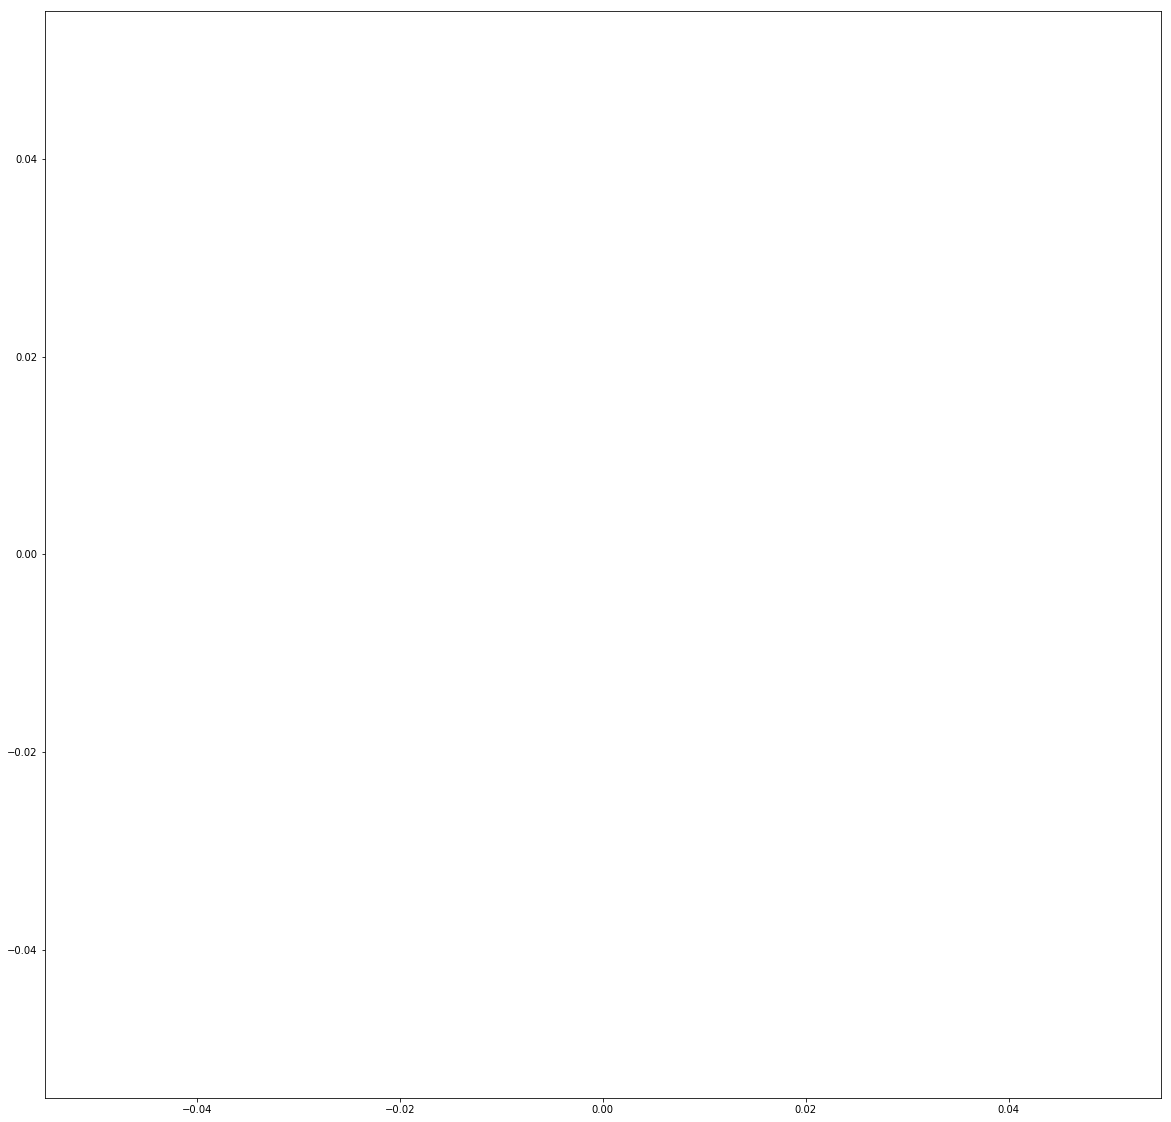

In [8]:
(_, y_train), (_, y_test) = cifar10.load_data()
y_train = np.squeeze(y_train)
print('data loaded')

y_train[0:25000].shape

print(tsne_features[:,0])
print(tsne_features[:,1])

from matplotlib import cm

import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=(y_train[0:25000]/10.0), s=10, edgecolors='none', cmap=cm.jet)
plt.show()